<a href="https://colab.research.google.com/github/rawat999/tensorflow-coursera/blob/master/Course_3_Week_2_BBC_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2021-07-24 04:12:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2021-07-24 04:12:20 (213 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [2]:
vocab_size = 1000 # YOUR CODE HERE
embedding_dim = 32 # YOUR CODE HERE
max_length = 150 # YOUR CODE HERE
trunc_type = 'post' # YOUR CODE HERE
padding_type = 'post' # YOUR CODE HERE
oov_tok = '<OOV>' # YOUR CODE HERE
training_portion = .8

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", 
             "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", 
             "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", 
             "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", 
             "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", 
             "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", 
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", 
             "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", 
             "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", 
             "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", 
             "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", 
             "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", 
             "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", 
             "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [4]:
with open('/tmp/bbc-text.csv', 'r') as csvfile:
  bbc_news = csv.reader(csvfile, delimiter=',')
  next(bbc_news)
  for row in bbc_news:
    labels.append(row[0])
    sentence = row[1]
    for word in stopwords:
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
    sentences.append(sentence)

print(len(sentences))
print(len(labels))
print(sentences[12])

2225
2225
crude oil prices back $50 cold weather across parts united states much europe pushed us crude oil prices $50 barrel first time almost three months.  freezing temperatures heavy snowfall increased demand heating fuel us  stocks low. fresh falls value dollar helped carry prices $50 mark first time since november. barrel us crude oil closed $2.80 $51.15 new york tuesday. opec members said tuesday saw no reason cut output.  although last year s peak $55.67 barrel  reached october  prices now well 2004 s average $41.48.  brent crude also rose london trading  adding $1.89 $48.62 close. much western europe north east america shivering unseasonably low temperatures recent days. decline us dollar five-week low euro also served inflate prices.  dollar moved sharply overnight oil following   said chris furness  senior market strategist 4cast.  dollar continues weaken  oil will obviously higher.   several opec members said cut production unlikely  citing rising prices strong demand oil a

In [5]:
train_size = int(len(sentences) * training_portion) # YOUR CODE HERE

train_sentences = sentences[:train_size] # YOUR CODE HERE
train_labels = labels[:train_size] # YOUR CODE HERE

validation_sentences = sentences[train_size:] # YOUR CODE HERE
validation_labels = labels[train_size:] # YOUR CODE HERE

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) # YOUR CODE HERE
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index # YOUR CODE HERE

train_sequences = tokenizer.texts_to_sequences(train_sentences) # YOUR CODE HERE
train_padded = pad_sequences(train_sequences, maxlen=max_length, 
                             padding=padding_type, truncating=trunc_type) # YOUR CODE HERE

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
150
200
150
192
150


In [7]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 150)


In [8]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [9]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, kernel_initializer=tf.keras.initializers.HeNormal()),
                             tf.keras.layers.Dense(6)
                             ])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=2e-06),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 32)           32000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 33,254
Trainable params: 33,254
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 2000
history = model.fit(train_padded, training_label_seq, epochs=num_epochs,
                    validation_data=(validation_padded, validation_label_seq),
                    verbose=2
                    )

Epoch 1/2000
56/56 - 1s - loss: 5.4935 - accuracy: 0.2354 - val_loss: 5.5790 - val_accuracy: 0.2607
Epoch 2/2000
56/56 - 0s - loss: 5.4419 - accuracy: 0.2388 - val_loss: 5.5349 - val_accuracy: 0.2607
Epoch 3/2000
56/56 - 0s - loss: 5.3907 - accuracy: 0.2393 - val_loss: 5.5005 - val_accuracy: 0.2607
Epoch 4/2000
56/56 - 0s - loss: 5.3378 - accuracy: 0.2416 - val_loss: 5.4890 - val_accuracy: 0.2652
Epoch 5/2000
56/56 - 0s - loss: 5.3205 - accuracy: 0.2399 - val_loss: 5.4814 - val_accuracy: 0.2629
Epoch 6/2000
56/56 - 0s - loss: 5.3049 - accuracy: 0.2399 - val_loss: 5.4716 - val_accuracy: 0.2652
Epoch 7/2000
56/56 - 0s - loss: 5.2368 - accuracy: 0.2427 - val_loss: 5.3958 - val_accuracy: 0.2719
Epoch 8/2000
56/56 - 0s - loss: 5.1782 - accuracy: 0.2421 - val_loss: 5.3227 - val_accuracy: 0.2742
Epoch 9/2000
56/56 - 0s - loss: 5.0812 - accuracy: 0.2455 - val_loss: 5.2830 - val_accuracy: 0.2742
Epoch 10/2000
56/56 - 0s - loss: 5.0376 - accuracy: 0.2478 - val_loss: 5.2592 - val_accuracy: 0.2719

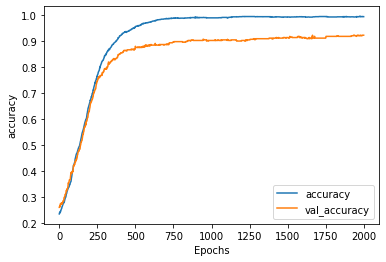

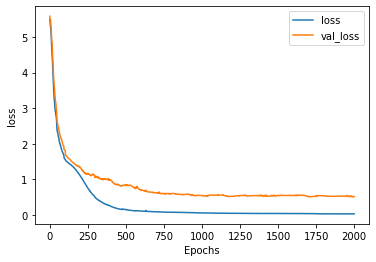

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [13]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 32)


In [14]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [15]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>